# Feature transformation or analysis

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
# The iris dataset
iris = load_iris()
X, y = iris.data, iris.target

## Add some noisy data to degrade features
random_features = np.random.RandomState(1000).uniform(0, 0.5, size=( len(X) , 20))
X = np.hstack((X, random_features))
print (X.shape, y.shape)

# Normalize data to 0-1
X = MinMaxScaler().fit_transform(X)

(150, 24) (150,)


In [3]:
# Split dataset to select feature and evaluate the classifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print (X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(120, 24) (30, 24) (120,) (30,)


In [4]:
# Create and train classifier
clf = SVC(kernel='rbf', gamma=1)

clf.fit(X_train, y_train)

SVC(gamma=1)

Acc :0.6667


<Axes: >

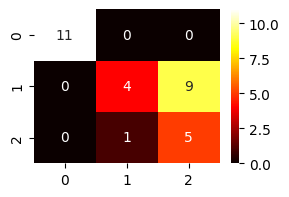

In [9]:
# Estimate predictions and compute some metrics

predictions = clf.predict(X_test)

# Print results
acc = accuracy_score(y_test, predictions)
cm = confusion_matrix(y_test, predictions)

print ('Acc :{0:.4f}'.format(acc))
_, ax = plt.subplots(figsize=(3,2))
sns.heatmap(cm, annot=True, cmap='hot', ax=ax)

### Principal Component Analysis (PCA) -> [Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)


In [10]:
from sklearn.decomposition import PCA

In [11]:
pca = PCA(n_components = 2 ) #

# Create reduced versions of subset
trans_train = pca.fit_transform(X_train, y_train)
trans_test = pca.transform(X_test)

print (trans_train.shape, trans_test.shape)

(120, 2) (30, 2)


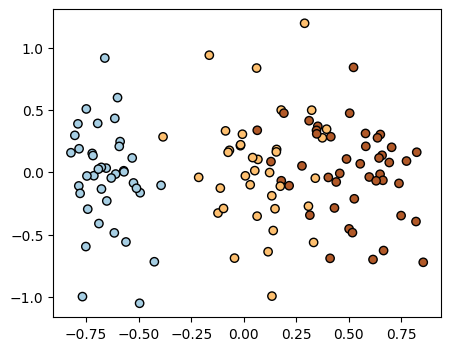

In [12]:
# Plot transformed points
_, ax = plt.subplots(figsize=(5,4))
ax.scatter(trans_train[:,0], trans_train[:,1], c=y_train, edgecolors='k', cmap='Paired')

In [13]:
# Classify PCA features and compute predictions
clf = SVC(kernel='rbf')

clf.fit(trans_train, y_train)

SVC()

In [14]:
# Clasification boundaries
h_min, h_max = trans_test[:, 0].min()-0.1 , trans_test[:, 0].max()+0.1
v_min, v_max = trans_test[:, 1].min()-0.1 , trans_test[:, 1].max()+0.1

h_grid, v_grid = np.meshgrid(np.linspace( h_min , h_max , 300), np.linspace( v_min , v_max , 300))
pred_grid = clf.predict(np.c_[h_grid.ravel(), v_grid.ravel()])
pred_grid = pred_grid.reshape(h_grid.shape)

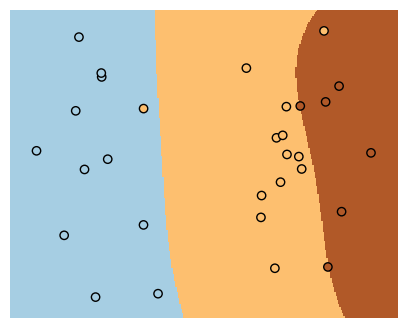

In [15]:
# plot everything
_, ax = plt.subplots(figsize = (5,4))

ax.pcolormesh( h_grid , v_grid , pred_grid , cmap = plt.cm.Paired) #, cmap = plt.cm.Paired

ax.scatter ( trans_test[:, 0] , trans_test[:, 1] , c=y_test , edgecolor = 'k', cmap = plt.cm.Paired) # edgecolors = 'k',
ax.set_axis_off()

For PCA
Accuracy before: 0.667, - Now : 0.900 



<Axes: >

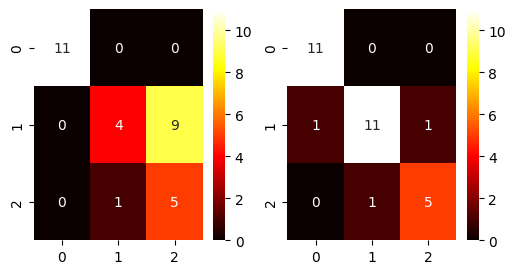

In [17]:
# Comput metrics
predictions = clf.predict(trans_test)
acc_pca = accuracy_score(y_test, predictions)
cm_pca = confusion_matrix(y_test, predictions)

# Compare against original model
print("For PCA")
print("Accuracy before: {0:.3f}, - Now : {1:.3f} \n".format( acc , acc_pca ))
_, axes = plt.subplots(1,2, figsize=(6,3))
sns.heatmap(cm, annot=True, cmap='hot', ax =axes[0])
sns.heatmap(cm_pca, annot=True, cmap='hot', ax=axes[1])

### Kernel PCA -> [Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html)


In [ ]:
from sklearn.decomposition import KernelPCA

In [ ]:
kpca = KernelPCA(n_components = _ )

# Create reduced versions of subset
trasn_train = _
trans_test

In [ ]:
# Plot transformed points


In [ ]:
# Classify kernel PCA features and compute predictions
clf = _


In [ ]:
# Clasification boundaries
x_min, x_max = _ , _
y_min, y_max = _ , _

x_grid, y_grid = np.meshgrid(np.linspace( _ , _ , 1000), np.linspace( _ , _ , 1000))
pred_grid = clf.predict(np.c_[x_grid.ravel(), y_grid.ravel()])
pred_grid = _

In [ ]:
# plot everything
_, ax = plt.subplots(figsize = (7,5))

ax.pcolormesh( _ , _ , _ , cmap = plt.cm.Paired) #, cmap = plt.cm.Paired

ax.scatter ( _ , _ , _ , edgecolor = 'k', cmap = plt.cm.Paired) # edgecolors = 'k',
ax.set_axis_off()

In [ ]:
# Comput metrics

# Compare against original model
print("For Kernel PCA")
print("Accuracy before: {0:.3f}, - Now : {1:.3f} \n".format( _ , _ ))
